In [2]:
import pandas as pd
%matplotlib inline

## Playgrounds

The number of playgrounds in each neighborhood indicates how kid-friendly the neighborhoods are, and therefore how easy it would be to entertain children that you're babysitting. We looked at the City of Pittsburgh Playgrounds data set to gather the following information.

In [15]:
# load in playground data
playgrounds = pd.read_csv("playgrounds.csv", sep=",")
playgrounds.head(10)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
5,230731204,Arlington Playground,NaN,Parks - Southern,Arlington Park,FERNLEAF ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418094,-79.975429
6,420573029,Armstrong Playground,NaN,Parks - Southern,Armstrong Park,S 12TH ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428165,-79.986121
7,113170092,Arsenal Playground,NaN,Parks - Northeast,Arsenal Park,40TH ST,https://tools.wprdc.org/images/pittsburgh/play...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466721,-79.961520
8,2089697067,August WIlson Playground,NaN,Parks - Schenley,August Wilson Park,CLIFF ST,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446510,-79.985968
9,2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,4-9,40.414666,-80.039342


In [11]:
# filtering out unnecessary columns
playgrounds[["id", "name", "neighborhood"]]

,id,name,neighborhood
0,731501774,Able Long Playground,Beechview
1,1461276747,Albert Graham Playground,Crawford-Roberts
2,1860709784,Alpine Playground,Central Northside
3,1770671485,Alton Playground,Beechview
4,18942817,Ammon Playground,Bedford Dwellings
...,...,...,...
120,1199980206,Phillips Lower Playground,Carrick
121,2108783707,Duncan Park Playground,Upper Lawrenceville
122,675610013,McKinley Upper Playground,Beltzhoover
123,1683700344,Liberty Green Playground,East Liberty


In [34]:
# tells us how many playgrounds are in each neighborhood
playgrounds["neighborhood"].value_counts()

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
                      ..
Esplen                 1
Fairywood              1
Regent Square          1
Allentown              1
East Allegheny         1
Name: neighborhood, Length: 68, dtype: int64

In [35]:
# shows neighborhoods with most playgrounds
top_neighborhood_counts = playgrounds["neighborhood"].value_counts().head(10)
top_neighborhood_counts

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
Beltzhoover            4
Allegheny Center       4
Carrick                3
Mount Washington       3
Elliott                3
Name: neighborhood, dtype: int64

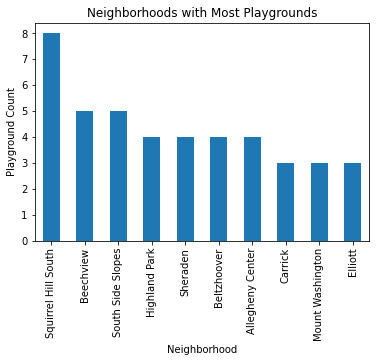

In [36]:
# plot bar graph of neighborhoods with most playgrounds
top_neighborhood_counts.plot.bar(title="Neighborhoods with Most Playgrounds", 
                                 xlabel="Neighborhood", ylabel="Playground Count")

This data set only shows neighborhoods with at least one playground, so looking at the lowest ranking neighborhoods isn't all that useful. Still, here it is.

In [37]:
# shows neighborhoods with fewest playgrounds (at least one)
bottom_neighborhood_counts = playgrounds["neighborhood"].value_counts().tail(10)
bottom_neighborhood_counts

Strip District      1
Stanton Heights     1
West Oakland        1
East Carnegie       1
Duquesne Heights    1
Esplen              1
Fairywood           1
Regent Square       1
Allentown           1
East Allegheny      1
Name: neighborhood, dtype: int64

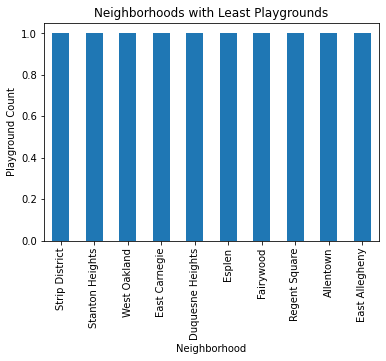

In [27]:
# plot bar graph of neighborhoods with least playgrounds
bottom_neighborhood_counts.plot.bar(title="Neighborhoods with Least Playgrounds", 
                                 xlabel="Neighborhood", ylabel="Playground Count")

See? Not that useful. Let's also look at a plot for all playgrounds. It won't be easy to read, but it will give us an idea of the shape of the graph.

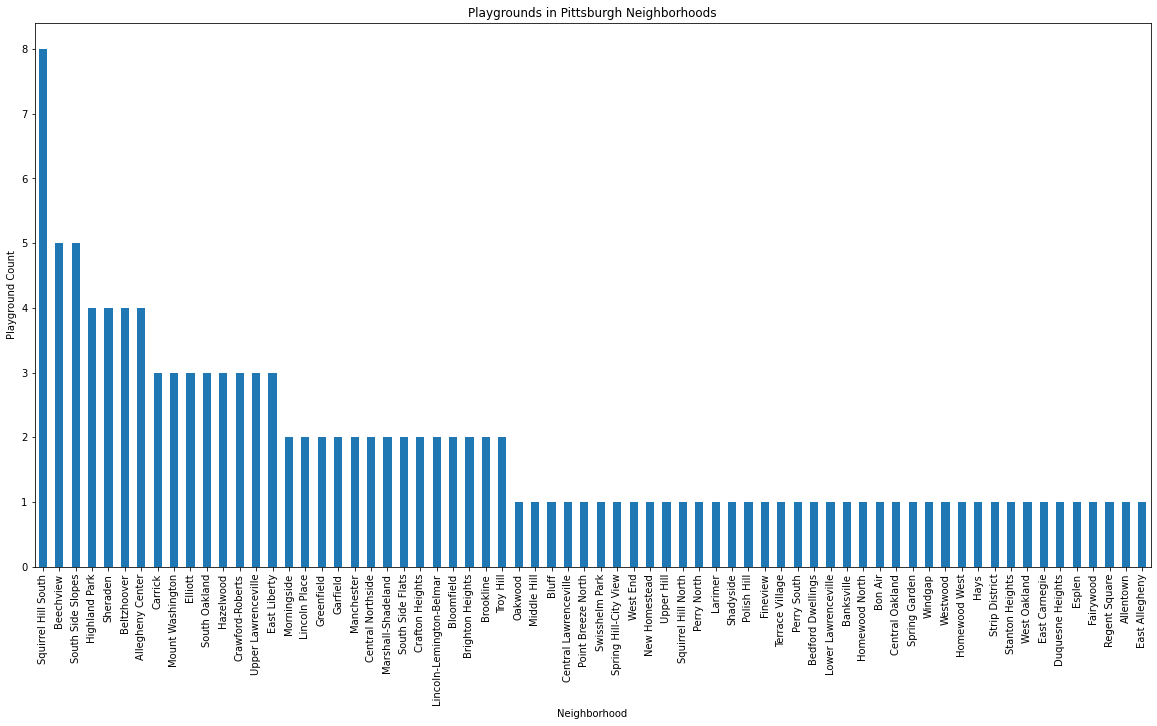

In [38]:
# shows the graph of all neighborhoods that have at least one playground
all_neighborhoods = playgrounds["neighborhood"].value_counts()
all_neighborhoods.plot.bar(title="Playgrounds in Pittsburgh Neighborhoods", 
                                 xlabel="Neighborhood", ylabel="Playground Count", figsize=(20,10))

This all goes to show that **Squirrel Hill South** is the "best" neighborhood in terms of finding a good place to entertain children. Let's see what our other data sets tell us!

## Signalized Intersections

Unlike playgrounds, we want to minimize the number of intersections that we might encounter while babysitting, because those are dangerous for kids. We definitely want to avoid any potentially dangerous situations with kids, so let's see which neighborhoods have the fewest intersections.

In [39]:
# load in intersection data
intersections = pd.read_csv("intersections.csv", sep=",")
intersections.head(10)

,id,name,description,flash_time,flash_yellow,operation_type,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1233506574,TS1,Aiken Ave - Baum Blvd,24 Hr stop and go,NaN,Fully Actuated,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.456941,-79.938539
1,322808398,TS10,Alexander St - Steuben St,24 Hr stop and go,NaN,Semi Actuated,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.441993,-80.034544
2,1626189126,TS100,Beeler St - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.443890,-79.938799
3,2085487046,TS101,Beeler St - Wilkins Ave,00:00 - 06:00,NaN,Fixed,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445636,-79.931220
4,1187990770,TS102,Bellefield Ave - Fifth Ave,24 Hr stop and go,FIFTH AVE,Fixed,North Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-7,40.446484,-79.951914
5,1501913538,TS103,Bellefield Ave - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,North Oakland,8.0,4.0,4.200398e+10,3.0,4.0,4.0,2-8,40.443926,-79.950692
6,780829291,TS104,Beltzhoover Ave - Warrington Ave,24 Hr stop and go,E WARRINGTON AVE,Fully Actuated,Allentown,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-21,40.421656,-79.997404
7,2111045907,TS105,Bennett St - Braddock Ave,24 Hr stop and go,BENNETT ST,Fixed,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.455041,-79.890383
8,1038462210,TS106,Bennett St - Brushton Ave,24 Hr stop and go,BENNETT ST,Fixed,Homewood South,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.454606,-79.888461
9,855106730,TS107,Bennett St - Dallas Ave - Frankstown Ave,24 Hr stop and go,NaN,Actuated,Homewood West,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-17,40.458093,-79.904139


In [40]:
# filtering out unnecessary columns
intersections[["id", "description", "neighborhood"]]

,id,description,neighborhood
0,1233506574,Aiken Ave - Baum Blvd,Bloomfield
1,322808398,Alexander St - Steuben St,West End
2,1626189126,Beeler St - Forbes Ave,Squirrel Hill North
3,2085487046,Beeler St - Wilkins Ave,Squirrel Hill North
4,1187990770,Bellefield Ave - Fifth Ave,North Oakland
...,...,...,...
778,1614046252,Flashing Beacon and Speed Minder,Greenfield
779,1830263951,Flashing Warning Device - Carson St - S 2nd St,South Shore
780,2132586828,RRFB - Carson St - Terminal Way,South Side Flats
781,1367398325,Sycamore St Approach,South Shore


In [41]:
# tells us how many intersections are in each neighborhood
intersections["neighborhood"].value_counts()

Central Business District    88
Shadyside                    35
Squirrel Hill South          31
East Liberty                 31
South Side Flats             30
                             ..
Terrace Village               1
New Homestead                 1
Fairywood                     1
Hays                          1
Windgap                       1
Name: neighborhood, Length: 82, dtype: int64

In [42]:
# shows neighborhoods with most intersections
most_neighborhood_counts = intersections["neighborhood"].value_counts().head(10)
most_neighborhood_counts

Central Business District    88
Shadyside                    35
Squirrel Hill South          31
East Liberty                 31
South Side Flats             30
Bloomfield                   30
North Oakland                28
Squirrel Hill North          22
Bluff                        21
Homewood South               20
Name: neighborhood, dtype: int64

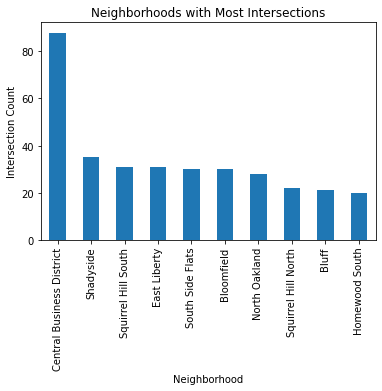

In [44]:
# plot bar graph of neighborhoods with most intersections
most_neighborhood_counts.plot.bar(title="Neighborhoods with Most Intersections", 
                                 xlabel="Neighborhood", ylabel="Intersection Count")

Uh oh. Looks like Squirrel Hill South might not be the best neighborhood to babysit in - there are a lot of intersections in that neighborhood!

In [45]:
# shows neighborhoods with least intersections
least_neighborhood_counts = intersections["neighborhood"].value_counts().tail(10)
least_neighborhood_counts

Bedford Dwellings       1
Regent Square           1
East Carnegie           1
Mount Oliver Borough    1
St. Clair               1
Terrace Village         1
New Homestead           1
Fairywood               1
Hays                    1
Windgap                 1
Name: neighborhood, dtype: int64

Since there are more than 10 neighborhoods with only one intersection, let's use a mask to get all of the neighborhoods with only one intersection.

In [72]:
# check if neighborhoods have one intersection or more
query_mask = intersections["neighborhood"].value_counts() == 1
query_mask

Central Business District    False
Shadyside                    False
Squirrel Hill South          False
East Liberty                 False
South Side Flats             False
                             ...  
Terrace Village               True
New Homestead                 True
Fairywood                     True
Hays                          True
Windgap                       True
Name: neighborhood, Length: 82, dtype: bool

In [73]:
# filter out neighborhoods with more than one intersection
intersections["neighborhood"].value_counts()[query_mask]

Arlington               1
Bedford Dwellings       1
Regent Square           1
East Carnegie           1
Mount Oliver Borough    1
St. Clair               1
Terrace Village         1
New Homestead           1
Fairywood               1
Hays                    1
Windgap                 1
Name: neighborhood, dtype: int64

Oh. Looks like there are actually 11 neighborhoods with only one intersection. That didn't help a lot, but it is good to note. Once again, we will also look at a (largely unreadable) representation of all the neighborhoods.

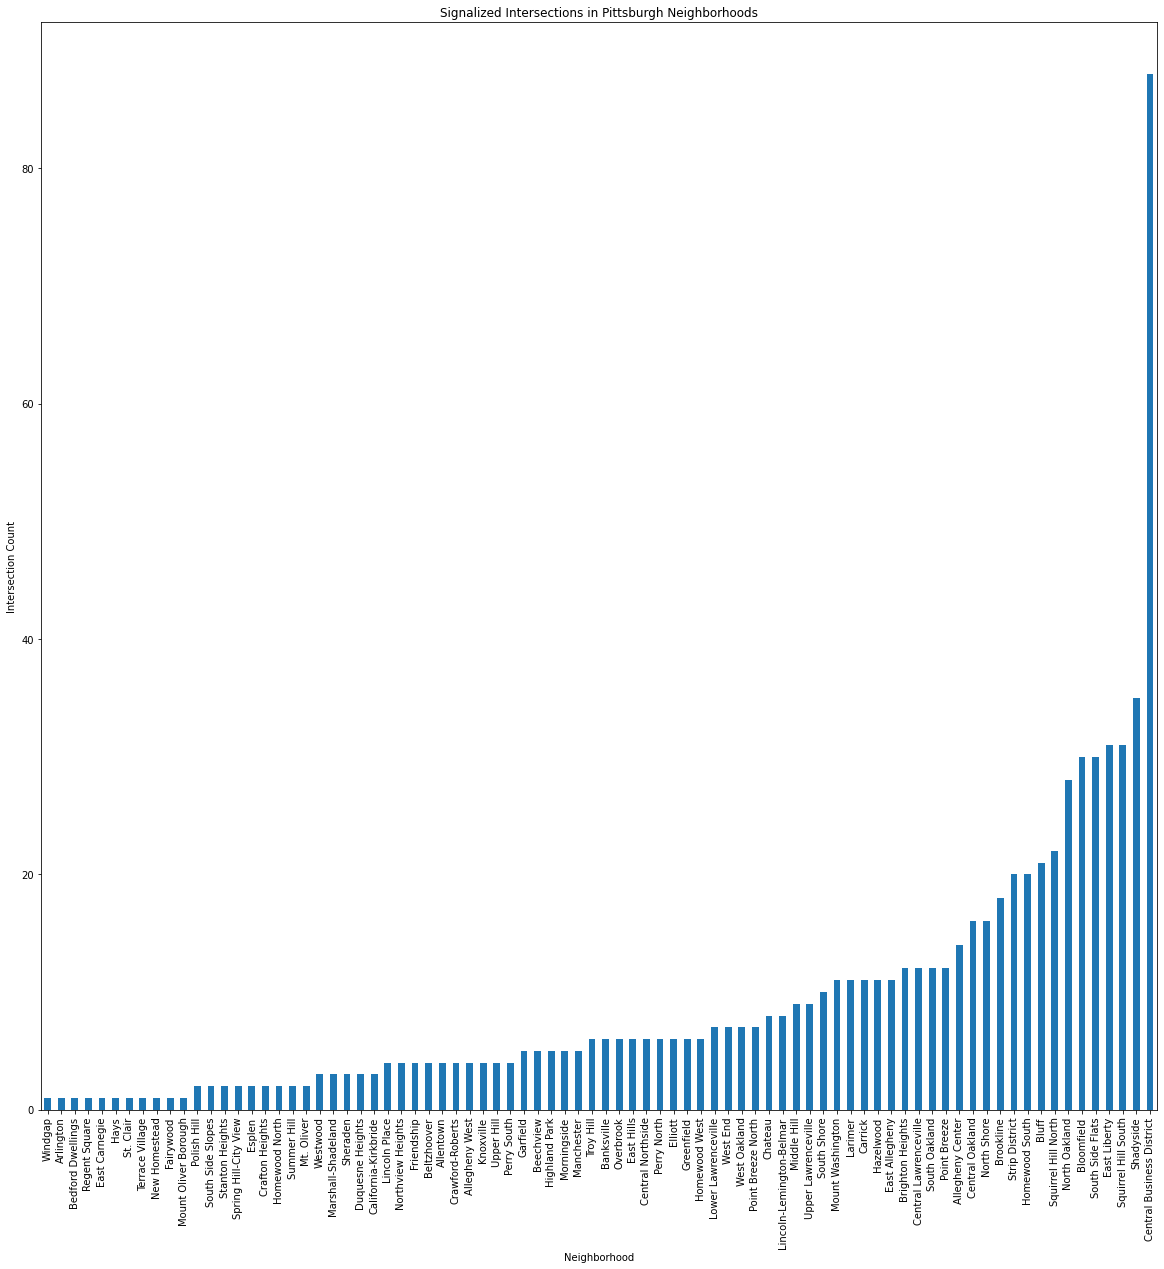

In [74]:
# plot all the neighborhoods
all_intersections = intersections["neighborhood"].value_counts()
all_intersections.sort_values().plot.bar(title="Signalized Intersections in Pittsburgh Neighborhoods",
                                 xlabel="Neighborhood", ylabel="Intersection Count", figsize=(20,20))

Based on this graph, we know to avoid babysitting in neighborhoods with lots of intersections like Central Business District (Downtown), Shadyside, and Squirrel Hill South. Now we can combine these data sets to figure out the best neighborhood.